In [54]:
#weighted clustering; consider some form of weighing for observations

#be sure to mention that collectica ommitted 1 in 18 rows

#fold special back in

#Load in the data

import pandas as pd
import numpy as np
data=pd.read_excel('typology.xlsx')
data.head()

,mergeid,sample,int_date,phase,fcall,attempts,refusal,stimes,ilang,p1version,...,ql1,ql1a,qc1,ll,cp,money2,ckinfo,iphoneuse,hphoneuse,weight
0,1100009,1,61417,1,170608,4,0,4,1,2,...,1,0,0,1,1,0,0,2,2,1.064516
1,1100012,1,60817,1,170608,1,0,1,1,1,...,1,0,0,1,1,0,0,2,2,4.000000
2,1100014,1,60817,1,170608,1,0,1,1,1,...,1,0,0,1,1,0,0,2,2,1.612903
3,1100018,1,61417,1,170608,6,1,6,1,2,...,1,0,0,1,1,0,0,2,2,3.741935
4,1100019,1,60817,1,170608,1,0,1,1,1,...,1,0,0,1,1,0,0,2,2,1.258065


In [55]:
data.iloc[2500:2510, 20:40]

,llitext2,qs1,cpitext1,cpitext2,qa1,qa1a,qb2,qb3,qb4,qa12,qa14a,qa14b,qa14c,qa14d,qa14e,qa15a,qa15b,qb18a,qb18b,q25a
2500,0,2,1,1,2,1,0,0,0,2,1,9,9,9,2,3,3,0,0,2
2501,0,2,2,2,1,2,0,0,0,1,1,1,2,1,2,3,4,0,0,1
2502,0,2,2,2,2,1,0,0,0,2,1,1,2,9,1,4,3,0,0,2
2503,0,2,1,1,1,2,0,0,0,1,9,2,2,2,2,2,4,0,0,1
2504,2,0,0,0,0,0,2,1,1,0,0,0,0,0,0,0,0,4,2,0
2505,1,0,0,0,0,0,1,2,9,0,0,0,0,0,0,0,0,2,4,0
2506,2,0,0,0,0,0,9,1,1,0,0,0,0,0,0,0,0,9,2,0
2507,2,0,0,0,0,0,2,2,2,0,0,0,0,0,0,0,0,2,4,0
2508,1,0,0,0,0,0,2,2,3,0,0,0,0,0,0,0,0,4,1,0
2509,1,0,0,0,0,0,2,2,2,0,0,0,0,0,0,0,0,1,3,0


In [56]:
form1 = data.iloc[0:2504 ,:]
form1.tail()

,mergeid,sample,int_date,phase,fcall,attempts,refusal,stimes,ilang,p1version,...,ql1,ql1a,qc1,ll,cp,money2,ckinfo,iphoneuse,hphoneuse,weight
2499,1225104,2,61817,1,170615,4,0,4,1,2,...,0,0,1,1,1,9,0,2,2,1.967742
2500,1225116,2,61817,1,170614,3,0,3,1,2,...,0,0,2,0,1,1,1,3,3,3.677419
2501,1225166,2,61817,1,170613,6,0,6,1,2,...,0,0,2,0,1,9,0,3,3,2.290323
2502,1225178,2,61817,1,170614,4,0,4,1,2,...,0,0,1,1,1,1,1,2,2,1.806452
2503,1225205,2,61817,1,170610,6,0,6,1,2,...,0,0,1,1,1,9,0,2,2,1.290323


In [57]:
#The next step is to remove questions that aren't super relevant to political opinion
list(form1)

['mergeid',
 'sample',
 'int_date',
 'phase',
 'fcall',
 'attempts',
 'refusal',
 'stimes',
 'ilang',
 'p1version',
 'cregion',
 'state',
 'density',
 'usr',
 'scregion',
 'sstate',
 'susr',
 'igender',
 'irace',
 'llitext1',
 'llitext2',
 'qs1',
 'cpitext1',
 'cpitext2',
 'qa1',
 'qa1a',
 'qb2',
 'qb3',
 'qb4',
 'qa12',
 'qa14a',
 'qa14b',
 'qa14c',
 'qa14d',
 'qa14e',
 'qa15a',
 'qa15b',
 'qb18a',
 'qb18b',
 'q25a',
 'q25b',
 'q25c',
 'q25d',
 'q25f',
 'q25g',
 'q25i',
 'q25k',
 'q25n',
 'q25p',
 'qa26',
 'qa27',
 'qb27',
 'qb28',
 'qb29',
 'qa30',
 'qb30',
 'qb31',
 'oftvote',
 'qb32',
 'qb33',
 'qb33a',
 'cheat',
 'qa36a',
 'qa36b',
 'qa36c',
 'qa36d',
 'qa37a',
 'qa37b',
 'qa37c',
 'qa37d',
 'q40',
 'qb42a',
 'qb42b',
 'qb42c',
 'qb42d',
 'qb46',
 'q50r',
 'q50u',
 'q50y',
 'q50aa',
 'q50cc',
 'q50ee',
 'q50hh',
 'qbx',
 'qe2',
 'qe1',
 'qe3',
 'employ1',
 'employ7',
 'qe11',
 'q51jj',
 'q51ll',
 'q51mm',
 'q51nn',
 'q51pp',
 'q51qq',
 'q51rr',
 'qb52',
 'qb52x',
 'qb53a',
 'qb53b

In [58]:
myListall = [
 #'qa1',
 #'qa1a', # I need to make this into one question ommited because it is about Donald Trump, not a specific policy or value 
 #  ommited'qb2', #consider omitting 
 #  ommited'qb3', # consider omitting
 # ommited'qb4', # also consider omitting
 'qa12',
 'qa14a',
 'qa14b',
 'qa14c',
 'qa14d',
 'qa14e', 
 #ommited   'qa15a', #consider ommiting
 #ommited   'qa15b', #consider ommiting
 #ommited   'qb18a', #consider ommiting
 #ommited   'qb18b', #consider ommiting
 'q25a',
 'q25b',
 'q25c',
 'q25d',
 'q25f',
 'q25g',
 'q25i',
 'q25k',
 'q25n',
 'q25p', # good
 'qa26',
        #ommitted 'qa27',
        # ommited 'qb27',
        # ommited 'qb28',
        # ommited 'qb29',
        # ommited'qa30',
 'qb30',
 'qb31',
 'qa36a', #consider ommitting
 'qa36b', #consider ommitting
 'qa36c', #consider ommitting
 'qa36d', #consider ommitting
 'qa37a', #consider ommitting
 'qa37b', #consider ommitting
 'qa37c', #consider ommitting
 'qa37d', #consider ommitting
 # ommited 'qb42a', #consider ommitting
 # ommited 'qb42b', #consider ommitting
 # ommited 'qb42c', #consider ommitting
 # ommited 'qb42d', #consider ommitting 
 'q50r',
 'q50u',
 'q50y',
 'q50aa',
 'q50cc',
 'q50ee',
 'qbx',
 'q51jj', 
 'q51ll',
 'q51mm', 
 'q51nn',        
 # ommited, too vague 'q51pp', #consider ommiting
 'q51qq',       
 #too vague, ommited 'qb52', #consider ommiting
 'qb52x',
 #'qb55a', #ommited
 #'qb55b', #ommited
 'qa62',  #consider ommiting
 'qa77',
 'qa77a',
 'qa77b',
 'qa78',
 'qb80',
 'qa126',
 'qa126a',
 'qa126b',
 'qa127',
 'qa128',
 'qa129',
 'qa143', 
         ]

In [59]:
droplistf1 = ['q25p', 'qb30', 'qb31', 'qbx', 'q51mm', 'q51qq', 'qb52x', 'qb80'] 
f1list = list(set(myListall).difference(set(droplistf1)))
f1list #this removes the questions that are only asked on form

['qa36b',
 'qa36c',
 'qa143',
 'qa14b',
 'q25f',
 'qa14a',
 'qa14d',
 'qa128',
 'qa77b',
 'qa37d',
 'q50r',
 'q51jj',
 'q50y',
 'q25a',
 'qa127',
 'qa12',
 'qa62',
 'qa126b',
 'qa77a',
 'qa77',
 'qa126a',
 'q50cc',
 'q25i',
 'q50u',
 'qa129',
 'qa37b',
 'q25d',
 'qa78',
 'qa36a',
 'qa26',
 'q51ll',
 'qa126',
 'q25k',
 'q50aa',
 'q25n',
 'q51nn',
 'qa36d',
 'qa14c',
 'qa14e',
 'q25b',
 'q25g',
 'qa37a',
 'q25c',
 'qa37c',
 'q50ee']

In [60]:
# 136: replace 9 w/ 0
# q25[all]: replace 5,9 w/0 
# q14[all] replace 3,9 w/0
# qa12 replace 9 w/0
# 50[all] replace 5,9 w/0
# 51[all] replace 5,9 w/0
# qa126[all] replace 9 w/ 0
# qa37[all]: replace 9 w/ 0
# qa26: replace 9 w, 0  
# qa36 [all] replace  w/ 0
# a143 replace 3,9, with 0
# qa126[all] replace 9 w / 0 
# qa127 replace 3,9 w/0
# qa78 replace 9 w/0






# q128 needs special treatment
# qa62 replace 9 w/ 0, replace 1 w/-1, replace 2 with -0.5, replace 3 with 1.
# must deal with 129 
# must deal with 77

In [61]:
f1 = form1[f1list]
f1.head()

,qa36b,qa36c,qa143,qa14b,q25f,qa14a,qa14d,qa128,qa77b,qa37d,...,q51nn,qa36d,qa14c,qa14e,q25b,q25g,qa37a,q25c,qa37c,q50ee
0,2,1,2,1,1,1,1,1,0,1,...,2,2,1,1,1,1,2,2,2,1
1,1,2,1,1,2,2,1,4,2,2,...,1,1,1,2,2,2,2,1,1,1
2,2,2,2,1,2,2,2,3,0,2,...,1,1,1,2,1,1,2,1,1,2
3,2,1,9,2,1,2,2,3,0,1,...,2,2,2,1,9,9,2,2,2,2
4,2,2,1,3,2,3,2,2,2,2,...,1,2,2,2,2,5,1,5,1,5


In [62]:
list2 = ['qa128', 'qa62', 'qa129','qa77', 'qa77a', 'qa77b']
special = f1[list2]
f1 = f1.drop(list2, axis = 1) 
set(f1.values.flatten()) # check to make sure there are no unexpected values

{0, 1, 2, 3, 5, 9}

In [93]:
special.head()

,qa128,qa62,qa129,qa77,qa77a,qa77b
0,1,1,2,1,1,0
1,4,1,4,2,0,2
2,3,3,1,1,2,0
3,3,2,9,1,9,0
4,2,1,3,2,0,2


In [103]:
special1 = special.iloc[:, [0,2]]
special1.head()

,qa128,qa129
0,1,2
1,4,4
2,3,1
3,3,9
4,2,3


In [104]:
special1 = special1.replace(9,0)
special1 = special1.replace(1, -1.25)
special1 = special1.replace(2, -.75)
special1 = special1.replace(3, .75)
special1 = special1.replace(4, 1.25)
special1.head()

,qa128,qa129
0,-1.25,-0.75
1,1.25,1.25
2,0.75,-1.25
3,0.75,0.00
4,-0.75,0.75


In [108]:
special2 = special.iloc[:,1]
special2 = special2.replace(2, 0.5)
special2 = special2.replace(3, -1)
special2 = special2.replace(9, 0)
special2.head()

0    1.0
1    1.0
2   -1.0
3    0.5
4    1.0
Name: qa62, dtype: float64

In [120]:
special3 = special.iloc[:,3:]
special3.head()

,qa77,qa77a,qa77b
0,1,1,0
1,2,0,2
2,1,2,0
3,1,9,0
4,2,0,2


In [115]:
def warming(q,qa,qb):
    if q == 1:
        if qa == 1 :
            return 1.25
        
        else:
            return 0
        
    elif q == 2:
        if qb == 1:
            return 0
        if qb == 2:
            return -1.25
        if qb == 9:
            return 1
        else:
            return('ERROR')
    
    else:
        return 0
    

In [118]:
warming(2,0,1)

0

In [124]:
special3['GW'] = special3.apply(lambda row: warming(row.qa77, row.qa77a, row.qa77b), axis = 1)


C:\Users\Taylor_Rao\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,qa77,qa77a,qa77b,GW
2499,1,1,0,1.25
2500,1,2,0,0.00
2501,2,0,1,0.00
2502,1,1,0,1.25
2503,2,0,1,0.00


In [63]:
f1 = f1.replace([3,5,9], 0)
f1 = f1.replace(1,-1)
f1 = f1.replace(2,1)
f1.head()

,qa36b,qa36c,qa143,qa14b,q25f,qa14a,qa14d,qa37d,q50r,q51jj,...,q51nn,qa36d,qa14c,qa14e,q25b,q25g,qa37a,q25c,qa37c,q50ee
0,1,-1,1,-1,-1,-1,-1,-1,1,-1,...,1,1,-1,-1,-1,-1,1,1,1,-1
1,-1,1,-1,-1,1,1,-1,1,1,1,...,-1,-1,-1,1,1,1,1,-1,-1,-1
2,1,1,1,-1,1,1,1,1,-1,-1,...,-1,-1,-1,1,-1,-1,1,-1,-1,1
3,1,-1,0,1,-1,1,1,-1,0,1,...,1,1,1,-1,0,0,1,1,1,1
4,1,1,-1,0,1,0,1,1,-1,1,...,-1,1,1,1,1,0,-1,0,-1,0


In [129]:
cleaned = pd.concat([f1, special1, special2, special3['GW']], axis = 1)

In [130]:
cleaned.tail()

,qa36b,qa36c,qa143,qa14b,q25f,qa14a,qa14d,qa37d,q50r,q51jj,...,q25b,q25g,qa37a,q25c,qa37c,q50ee,qa128,qa129,qa62,GW
2499,1,-1,1,1,-1,-1,1,-1,1,-1,...,-1,-1,1,1,-1,-1,-1.25,-1.25,0.5,1.25
2500,1,-1,1,0,-1,-1,0,1,-1,-1,...,-1,-1,1,1,1,1,-0.75,-0.75,-1.0,0.00
2501,1,-1,1,-1,1,-1,-1,1,-1,1,...,1,1,-1,1,-1,1,0.75,1.25,0.5,0.00
2502,1,-1,1,-1,-1,-1,0,1,1,1,...,-1,-1,1,1,1,-1,0.75,0.75,-1.0,1.25
2503,1,1,-1,1,1,0,1,1,-1,-1,...,1,1,-1,-1,-1,1,0.00,-1.25,0.5,0.00


In [135]:
from sklearn.decomposition import PCA
pca = PCA(2)
principalComponents = pca.fit_transform(cleaned)
#principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
per_var = np.round(pca.explained_variance_ratio_* 100, decimals = 1)
labels = ['PC' + str(x) for x in range(1, len(per_var )+1)]

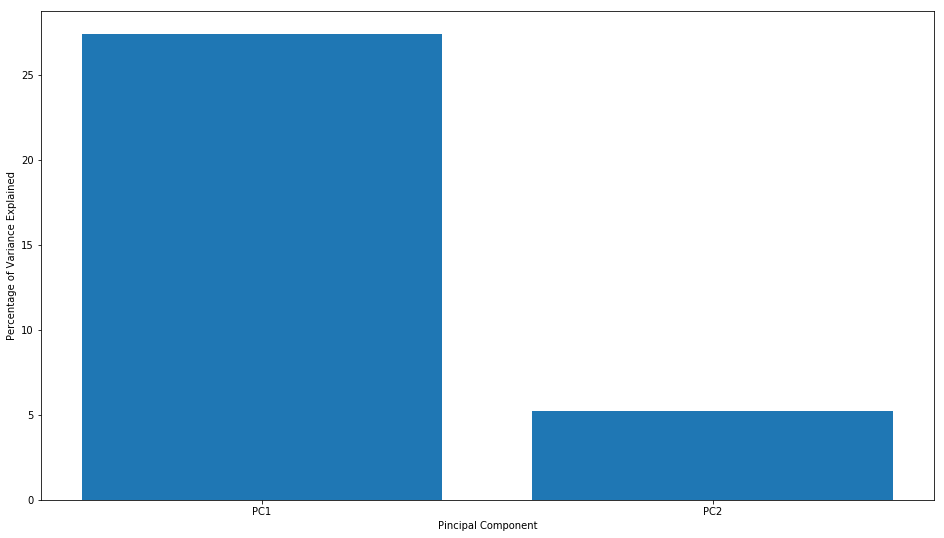

In [136]:
import matplotlib.pyplot as plt

plt.bar(range(1,len(per_var)+1), per_var, tick_label=labels)
plt.ylabel('Percentage of Variance Explained')
plt.xlabel('Pincipal Component')
plt.show()


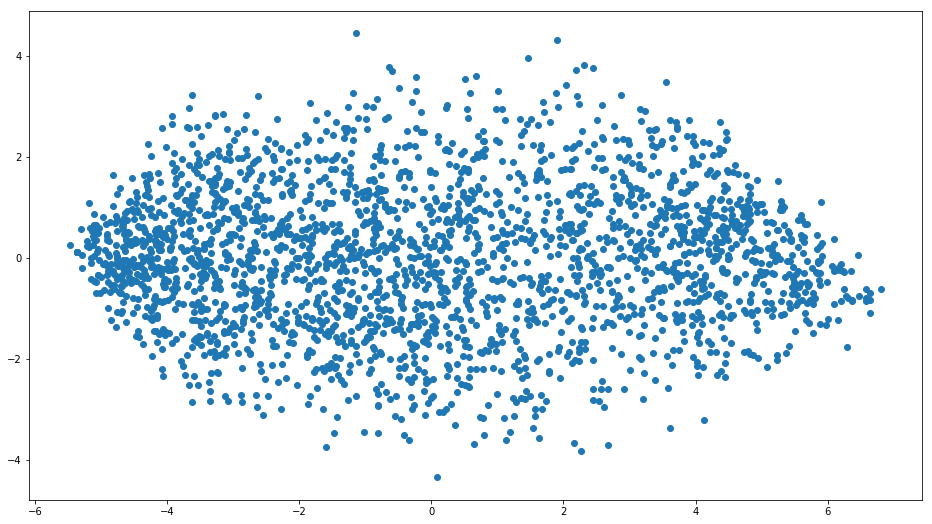

In [137]:
x = principalComponents[:,0]
y = principalComponents[:,1]
plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(x,y)
plt.figure(figsize=(1,2))
plt.show()

In [138]:
target = form1['ideo']
df = pd.DataFrame(principalComponents)
finalDf = pd.concat([df, target], axis =1)

In [139]:
finalDf.head()

,0,1,ideo
0,-4.473554,-1.553770,5
1,4.442529,-2.074766,1
2,2.170373,1.953721,3
3,-1.766714,0.670164,1
4,4.976760,1.064426,2


In [140]:
finalDf = finalDf.rename(index=str, columns={0: 'principal component 1', 1: 'principal component 2'})

In [141]:
fig = plt.figure(figsize = (16,9))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 2, 3, 4, 5, 9]
colors = ['r', 'r', 'm', 'b', 'b', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['ideo'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [142]:
fig = plt.figure(figsize = (16,9))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 2, 3, 4, 5, 9]
colors = ['g', 'r', 'm', 'b', 'k', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['ideo'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

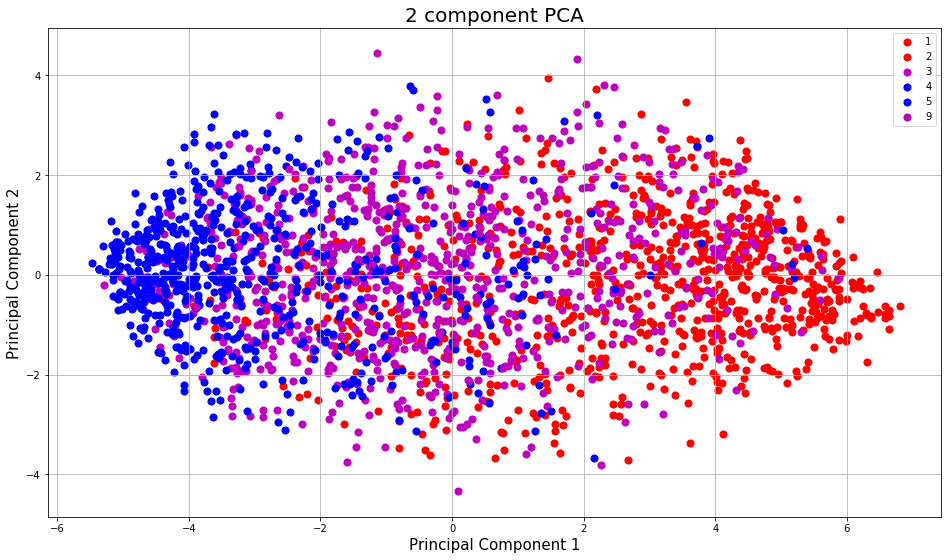

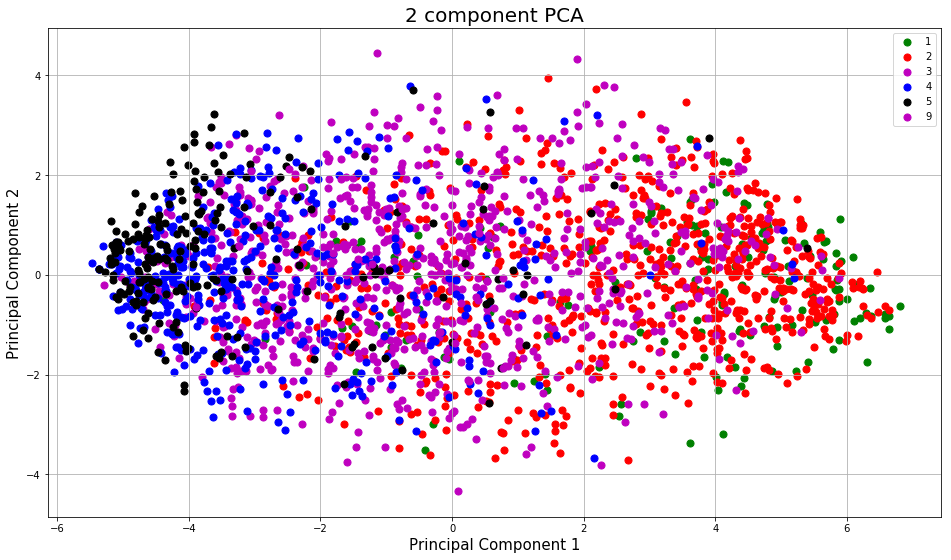

In [143]:
plt.show()

In [144]:
target1 = form1['party']
finalDf1 = pd.concat([df, target1], axis =1)
finalDf1 = finalDf1.rename(index=str, columns={0: 'principal component 1', 1: 'principal component 2'})

In [145]:
finalDf1.head()

,principal component 1,principal component 2,party
0,-4.473554,-1.553770,2
1,4.442529,-2.074766,1
2,2.170373,1.953721,1
3,-1.766714,0.670164,2
4,4.976760,1.064426,1


In [146]:
fig = plt.figure(figsize = (16,9))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 2, 3, 4, 5, 9]
colors = ['r', 'b', 'm', 'm', 'm', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf1['party'] == target
    ax.scatter(finalDf1.loc[indicesToKeep, 'principal component 1']
               , finalDf1.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(['Republican', 'Democrat', 'independant', 'no preference', 'other party', "don't know"])
ax.grid()

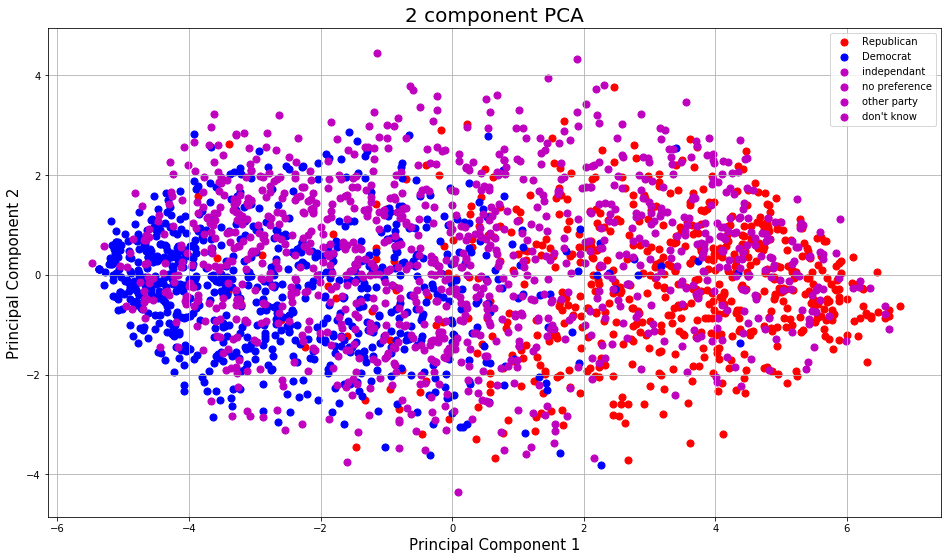

In [147]:
plt.show()